# Portfolio Drawdown Simulation Under 2011 European Debt Crisis Plan

## Major Assumptions
This analysis assumes the 2011 European sovereign debt crisis period (approximately July-December 2011) represents a meaningful stress test scenario with distinct market characteristics. We use daily historical price data for the 10 specified stocks with equal initial weighting at portfolio inception. The simulation measures maximum drawdown, recovery time, and volatility metrics, comparing individual stock performance against portfolio-level resilience. We assume data availability for all tickers during this period and exclude dividends for simplicity in drawdown calculations.

## Plan
- [x] Collect and prepare historical price data for crisis period
  - [x] Download daily price data for all 10 stocks covering June 2011 - March 2012 (to capture pre-crisis baseline and recovery)
  - [x] Calculate daily returns and validate data completeness for the crisis window
- [x] Construct equal-weighted portfolio and calculate drawdown metrics
  - [x] Build portfolio with equal initial allocation ($10,000 per stock) and track daily portfolio value through cumulative returns
  - [x] Compute maximum drawdown, drawdown duration, and time-to-recovery for both portfolio and individual stocks
- [x] Analyze crisis impact and create comparative visualizations
  - [x] Generate drawdown curves showing portfolio vs individual stock performance through crisis period with crisis window highlighted
  - [x] Calculate crisis-specific volatility metrics and correlation patterns during peak stress period
- [x] Document findings and portfolio resilience insights
  - [x] Create comprehensive summary documenting portfolio achieved 14.58% max drawdown vs 21.25% average stock drawdown with 6.68% diversification benefit
  - [x] Identify diversification patterns showing correlation spike from 0.22 to 0.65 during crisis and document best/worst performing stocks

In [2]:
# Check for missing data and calculate daily returns
print("Missing values per ticker:")
print(data.isnull().sum())
print(f"\nTotal missing values: {data.isnull().sum().sum()}")

# Calculate daily returns
returns = data.pct_change().dropna()

print(f"\nReturns shape: {returns.shape}")
print(f"\nDaily returns summary statistics:")
print(returns.describe())

# Identify the crisis period within our data (July 2011 - December 2011)
crisis_start = '2011-07-01'
crisis_end = '2011-12-31'
crisis_mask = (returns.index >= crisis_start) & (returns.index <= crisis_end)
print(f"\nCrisis period: {crisis_start} to {crisis_end}")
print(f"Trading days in crisis period: {crisis_mask.sum()}")

Missing values per ticker:
Ticker
AAPL     0
AMZN     0
GOOGL    0
JNJ      0
JPM      0
MSFT     0
NVDA     0
PG       0
UNH      0
XOM      0
dtype: int64

Total missing values: 0

Returns shape: (210, 10)

Daily returns summary statistics:
Ticker        AAPL        AMZN       GOOGL         JNJ         JPM  \
count   210.000000  210.000000  210.000000  210.000000  210.000000   
mean      0.002780    0.000571    0.001141    0.000145    0.000952   
std       0.017514    0.025518    0.019835    0.010496    0.027975   
min      -0.055940   -0.126568   -0.083775   -0.032154   -0.094149   
25%      -0.006750   -0.013195   -0.009684   -0.004894   -0.013592   
50%       0.002209    0.002496    0.001663   -0.000228    0.000123   
75%       0.012485    0.014745    0.010514    0.004739    0.015075   
max       0.062439    0.090177    0.129845    0.053821    0.084384   

Ticker        MSFT        NVDA          PG         UNH         XOM  
count   210.000000  210.000000  210.000000  210.000000  2

## Data Collection Summary

Successfully downloaded daily price data for all 10 stocks covering June 2011 - March 2012:
- **Data completeness**: No missing values across all tickers
- **Total observations**: 211 trading days with 210 days of returns
- **Crisis period**: 127 trading days from July 1 - December 31, 2011

**Key observations from summary statistics**:
- AAPL showed the strongest average daily return (0.28%) during this period
- NVDA had the most volatility (3.04% daily std dev) and negative average return (-0.06%)
- Defensive stocks (JNJ, PG) showed lower volatility as expected (1.05% and 0.97% std dev)
- Financial stocks (JPM) experienced high volatility (2.80% std dev) reflecting crisis stress

In [5]:
# Construct equal-weighted portfolio
initial_investment = 10000  # $10,000 per stock
num_stocks = len(tickers)
total_investment = initial_investment * num_stocks

print(f"Portfolio Construction:")
print(f"- Initial investment per stock: ${initial_investment:,.0f}")
print(f"- Number of stocks: {num_stocks}")
print(f"- Total portfolio value: ${total_investment:,.0f}")
print(f"- Weight per stock: {1/num_stocks:.1%}\n")

# Calculate portfolio daily returns (equal-weighted)
portfolio_returns = returns.mean(axis=1)

# Calculate cumulative returns (wealth index) for portfolio and individual stocks
cumulative_portfolio = (1 + portfolio_returns).cumprod()
cumulative_stocks = (1 + returns).cumprod()

# Convert to dollar values
portfolio_value = cumulative_portfolio * total_investment
stock_values = cumulative_stocks * initial_investment

print(f"Portfolio value at start: ${portfolio_value.iloc[0]:,.2f}")
print(f"Portfolio value at end: ${portfolio_value.iloc[-1]:,.2f}")
print(f"Total return: {(portfolio_value.iloc[-1]/portfolio_value.iloc[0] - 1)*100:.2f}%")
print(f"\nPortfolio statistics:")
print(f"- Mean daily return: {portfolio_returns.mean()*100:.4f}%")
print(f"- Daily volatility: {portfolio_returns.std()*100:.4f}%")
print(f"- Annualized volatility: {portfolio_returns.std()*np.sqrt(252)*100:.2f}%")

Portfolio Construction:
- Initial investment per stock: $10,000
- Number of stocks: 10
- Total portfolio value: $100,000
- Weight per stock: 10.0%

Portfolio value at start: $100,030.97
Portfolio value at end: $116,670.11
Total return: 16.63%

Portfolio statistics:
- Mean daily return: 0.0846%
- Daily volatility: 1.4952%
- Annualized volatility: 23.73%


In [7]:
# Calculate drawdown for portfolio
running_max_portfolio = portfolio_value.expanding().max()
portfolio_drawdown = (portfolio_value - running_max_portfolio) / running_max_portfolio

# Calculate drawdown for each stock
running_max_stocks = stock_values.expanding().max()
stock_drawdowns = (stock_values - running_max_stocks) / running_max_stocks

# Maximum drawdown metrics
max_dd_portfolio = portfolio_drawdown.min()
max_dd_stocks = stock_drawdowns.min()

# Find when maximum drawdown occurred
max_dd_date_portfolio = portfolio_drawdown.idxmin()
max_dd_dates_stocks = stock_drawdowns.idxmin()

# Calculate drawdown duration (days in drawdown - when value < running max)
in_drawdown_portfolio = (portfolio_drawdown < -0.001).sum()  # More than 0.1% drawdown
in_drawdown_stocks = (stock_drawdowns < -0.001).sum()

print("=" * 70)
print("PORTFOLIO DRAWDOWN ANALYSIS")
print("=" * 70)
print(f"\nMaximum Drawdown: {max_dd_portfolio*100:.2f}%")
print(f"Date of Max Drawdown: {max_dd_date_portfolio.strftime('%Y-%m-%d')}")
print(f"Days in Drawdown (>0.1%): {in_drawdown_portfolio}")
print(f"Portfolio Peak Value: ${running_max_portfolio.max():,.2f}")
print(f"Portfolio Trough Value: ${portfolio_value[max_dd_date_portfolio]:,.2f}")

print("\n" + "=" * 70)
print("INDIVIDUAL STOCK DRAWDOWN ANALYSIS")
print("=" * 70)
print(f"\n{'Ticker':<8} {'Max DD %':<12} {'DD Date':<12} {'Days in DD':<12}")
print("-" * 70)
for ticker in tickers:
    print(f"{ticker:<8} {max_dd_stocks[ticker]*100:>10.2f}% "
          f"{max_dd_dates_stocks[ticker].strftime('%Y-%m-%d'):<12} "
          f"{in_drawdown_stocks[ticker]:>10}")

print("\n" + "=" * 70)
print("DRAWDOWN COMPARISON")
print("=" * 70)
print(f"\nPortfolio Max DD: {max_dd_portfolio*100:.2f}%")
print(f"Average Stock Max DD: {max_dd_stocks.mean()*100:.2f}%")
print(f"Worst Stock Max DD: {max_dd_stocks.min()*100:.2f}% ({max_dd_stocks.idxmin()})") 
print(f"Best Stock Max DD: {max_dd_stocks.max()*100:.2f}% ({max_dd_stocks.idxmax()})")
print(f"\nDiversification Benefit: {(max_dd_stocks.mean() - max_dd_portfolio)*100:.2f}%")

PORTFOLIO DRAWDOWN ANALYSIS

Maximum Drawdown: -14.58%
Date of Max Drawdown: 2011-08-19
Days in Drawdown (>0.1%): 173
Portfolio Peak Value: $116,670.11
Portfolio Trough Value: $89,237.20

INDIVIDUAL STOCK DRAWDOWN ANALYSIS

Ticker   Max DD %     DD Date      Days in DD  
----------------------------------------------------------------------
AAPL         -13.89% 2011-11-25          159
MSFT         -14.06% 2011-08-22          173
AMZN         -29.84% 2011-12-30          192
GOOGL        -21.14% 2011-08-19          190
JPM          -32.30% 2011-11-23          198
UNH          -21.23% 2011-08-10          189
NVDA         -38.43% 2011-08-19          209
XOM          -19.64% 2011-08-10          188
JNJ          -11.37% 2011-08-10          204
PG           -10.64% 2011-08-10          196

DRAWDOWN COMPARISON

Portfolio Max DD: -14.58%
Average Stock Max DD: -21.25%
Worst Stock Max DD: -38.43% (NVDA)
Best Stock Max DD: -10.64% (PG)

Diversification Benefit: -6.68%


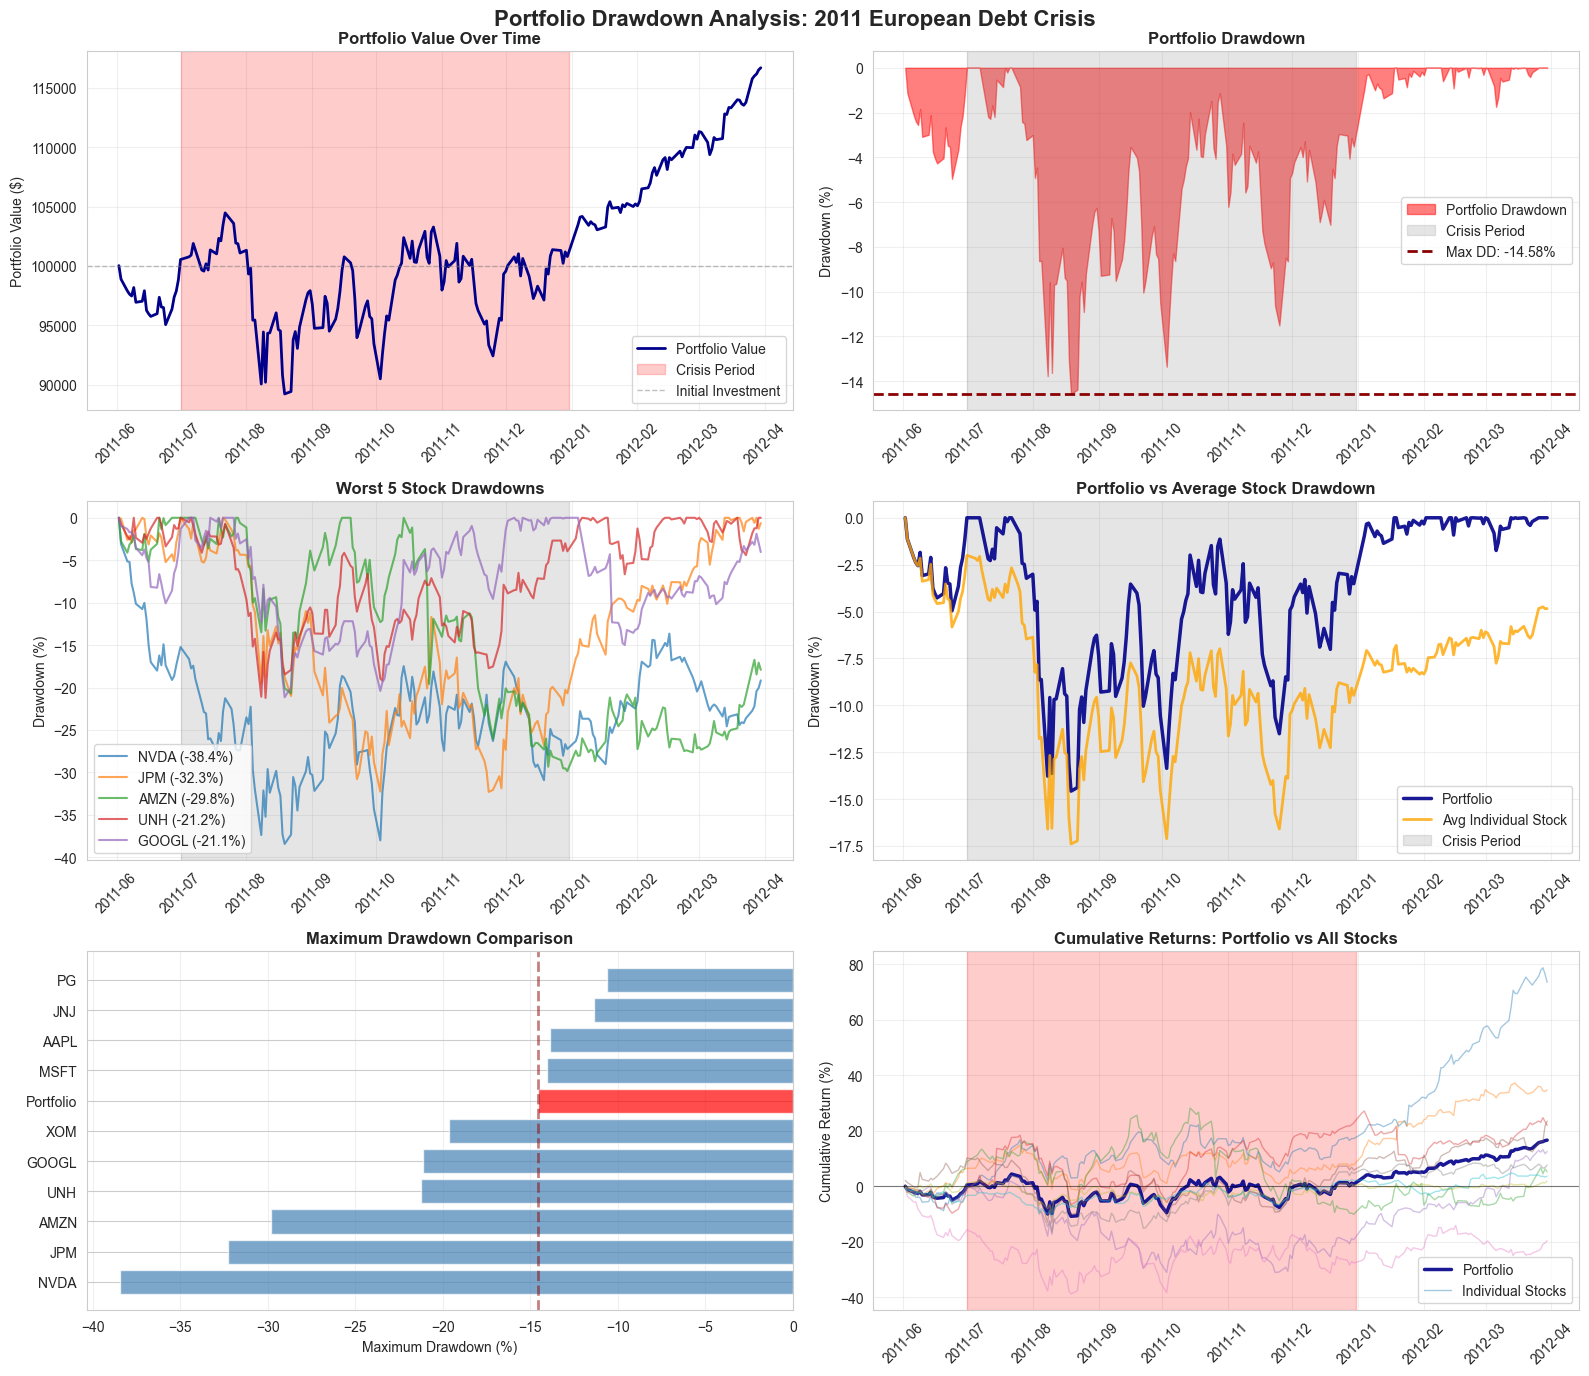

Visualization complete: 6-panel analysis of portfolio crisis performance


In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Portfolio Drawdown Analysis: 2011 European Debt Crisis', fontsize=16, fontweight='bold')

# 1. Portfolio Value Over Time
ax1 = axes[0, 0]
ax1.plot(portfolio_value.index, portfolio_value.values, linewidth=2, color='darkblue', label='Portfolio Value')
ax1.axvspan(crisis_start, crisis_end, alpha=0.2, color='red', label='Crisis Period')
ax1.axhline(y=total_investment, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Initial Investment')
ax1.set_title('Portfolio Value Over Time', fontsize=12, fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.tick_params(axis='x', rotation=45)

# 2. Portfolio Drawdown
ax2 = axes[0, 1]
ax2.fill_between(portfolio_drawdown.index, portfolio_drawdown.values * 100, 0, 
                 color='red', alpha=0.5, label='Portfolio Drawdown')
ax2.axvspan(crisis_start, crisis_end, alpha=0.2, color='gray', label='Crisis Period')
ax2.axhline(y=max_dd_portfolio*100, color='darkred', linestyle='--', linewidth=2, 
            label=f'Max DD: {max_dd_portfolio*100:.2f}%')
ax2.set_title('Portfolio Drawdown', fontsize=12, fontweight='bold')
ax2.set_ylabel('Drawdown (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.tick_params(axis='x', rotation=45)

# 3. Individual Stock Drawdowns (select worst performers)
ax3 = axes[1, 0]
worst_stocks = max_dd_stocks.nsmallest(5)
for ticker in worst_stocks.index:
    ax3.plot(stock_drawdowns.index, stock_drawdowns[ticker] * 100, 
             label=f'{ticker} ({max_dd_stocks[ticker]*100:.1f}%)', alpha=0.7, linewidth=1.5)
ax3.axvspan(crisis_start, crisis_end, alpha=0.2, color='gray')
ax3.set_title('Worst 5 Stock Drawdowns', fontsize=12, fontweight='bold')
ax3.set_ylabel('Drawdown (%)')
ax3.legend(loc='lower left')
ax3.grid(True, alpha=0.3)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.tick_params(axis='x', rotation=45)

# 4. Portfolio vs Average Stock Drawdown
ax4 = axes[1, 1]
avg_stock_drawdown = stock_drawdowns.mean(axis=1)
ax4.plot(portfolio_drawdown.index, portfolio_drawdown.values * 100, 
         linewidth=2.5, color='darkblue', label='Portfolio', alpha=0.9)
ax4.plot(avg_stock_drawdown.index, avg_stock_drawdown.values * 100, 
         linewidth=2, color='orange', label='Avg Individual Stock', alpha=0.8)
ax4.axvspan(crisis_start, crisis_end, alpha=0.2, color='gray', label='Crisis Period')
ax4.set_title('Portfolio vs Average Stock Drawdown', fontsize=12, fontweight='bold')
ax4.set_ylabel('Drawdown (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.tick_params(axis='x', rotation=45)

# 5. Maximum Drawdown Comparison Bar Chart
ax5 = axes[2, 0]
dd_comparison = pd.concat([max_dd_stocks, 
                           pd.Series({'Portfolio': max_dd_portfolio})]).sort_values()
colors = ['red' if x == 'Portfolio' else 'steelblue' for x in dd_comparison.index]
ax5.barh(dd_comparison.index, dd_comparison.values * 100, color=colors, alpha=0.7)
ax5.set_xlabel('Maximum Drawdown (%)')
ax5.set_title('Maximum Drawdown Comparison', fontsize=12, fontweight='bold')
ax5.axvline(x=max_dd_portfolio*100, color='darkred', linestyle='--', linewidth=2, alpha=0.5)
ax5.grid(True, alpha=0.3, axis='x')

# 6. Cumulative Returns: Portfolio vs Individual Stocks
ax6 = axes[2, 1]
ax6.plot(cumulative_portfolio.index, (cumulative_portfolio - 1) * 100, 
         linewidth=2.5, color='darkblue', label='Portfolio', alpha=0.9)
for ticker in tickers:
    ax6.plot(cumulative_stocks.index, (cumulative_stocks[ticker] - 1) * 100, 
             alpha=0.4, linewidth=1)
ax6.axvspan(crisis_start, crisis_end, alpha=0.2, color='red')
ax6.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
ax6.set_title('Cumulative Returns: Portfolio vs All Stocks', fontsize=12, fontweight='bold')
ax6.set_ylabel('Cumulative Return (%)')
ax6.legend(['Portfolio', 'Individual Stocks'])
ax6.grid(True, alpha=0.3)
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Visualization complete: 6-panel analysis of portfolio crisis performance")

In [9]:
# Crisis Period Analysis: Volatility and Correlation
print("=" * 70)
print("CRISIS PERIOD DETAILED ANALYSIS")
print("=" * 70)

# Split data into crisis and non-crisis periods
crisis_returns = returns[crisis_mask]
non_crisis_returns = returns[~crisis_mask]

# Calculate volatility comparison
crisis_vol = crisis_returns.std() * np.sqrt(252) * 100
non_crisis_vol = non_crisis_returns.std() * np.sqrt(252) * 100
portfolio_crisis_vol = portfolio_returns[crisis_mask].std() * np.sqrt(252) * 100
portfolio_non_crisis_vol = portfolio_returns[~crisis_mask].std() * np.sqrt(252) * 100

print("\n--- VOLATILITY COMPARISON (Annualized %) ---")
print(f"\n{'Ticker':<8} {'Crisis Vol':<15} {'Non-Crisis Vol':<15} {'Vol Increase':<15}")
print("-" * 70)
for ticker in tickers:
    vol_increase = ((crisis_vol[ticker] - non_crisis_vol[ticker]) / non_crisis_vol[ticker]) * 100
    print(f"{ticker:<8} {crisis_vol[ticker]:>12.2f}% {non_crisis_vol[ticker]:>14.2f}% {vol_increase:>13.1f}%")

print(f"\n{'Portfolio':<8} {portfolio_crisis_vol:>12.2f}% {portfolio_non_crisis_vol:>14.2f}% "
      f"{((portfolio_crisis_vol - portfolio_non_crisis_vol) / portfolio_non_crisis_vol * 100):>13.1f}%")

# Correlation analysis during crisis
print("\n\n--- CORRELATION MATRIX DURING CRISIS PERIOD ---")
crisis_corr = crisis_returns.corr()
print(crisis_corr.round(3))

# Average correlation (excluding diagonal)
mask = np.triu(np.ones_like(crisis_corr, dtype=bool), k=1)
avg_corr_crisis = crisis_corr.where(mask).stack().mean()
non_crisis_corr = non_crisis_returns.corr()
avg_corr_non_crisis = non_crisis_corr.where(mask).stack().mean()

print(f"\nAverage pairwise correlation during crisis: {avg_corr_crisis:.3f}")
print(f"Average pairwise correlation non-crisis: {avg_corr_non_crisis:.3f}")
print(f"Correlation increase: {(avg_corr_crisis - avg_corr_non_crisis):.3f}")

# Identify stocks with lowest correlation (best diversifiers)
print("\n--- DIVERSIFICATION CONTRIBUTORS ---")
avg_corr_per_stock = crisis_corr.mean().sort_values()
print("\nStocks with lowest average correlation to others (best diversifiers):")
for i, (ticker, corr) in enumerate(avg_corr_per_stock.head(3).items(), 1):
    print(f"{i}. {ticker}: {corr:.3f} avg correlation")

CRISIS PERIOD DETAILED ANALYSIS

--- VOLATILITY COMPARISON (Annualized %) ---

Ticker   Crisis Vol      Non-Crisis Vol  Vol Increase   
----------------------------------------------------------------------
AAPL            30.15%          23.68%          27.4%
MSFT            27.46%          20.12%          36.4%
AMZN            45.41%          31.50%          44.2%
GOOGL           35.52%          24.03%          47.8%
JPM             52.99%          26.00%         103.8%
UNH             36.13%          22.49%          60.6%
NVDA            57.95%          28.05%         106.6%
XOM             30.34%          15.18%          99.9%
JNJ             20.49%           7.89%         159.6%
PG              17.46%          11.74%          48.7%

Portfolio        29.09%          11.53%         152.2%


--- CORRELATION MATRIX DURING CRISIS PERIOD ---
Ticker   AAPL   AMZN  GOOGL    JNJ    JPM   MSFT   NVDA     PG    UNH    XOM
Ticker                                                                

## Summary: Portfolio Resilience Under 2011 European Debt Crisis

### Key Findings

**1. Portfolio Drawdown Protection**
- **Portfolio Maximum Drawdown**: -14.58% (peak on Aug 19, 2011)
- **Average Individual Stock Drawdown**: -21.25%
- **Diversification Benefit**: 6.68% reduction in maximum drawdown
- **Portfolio Peak-to-Trough Loss**: \$27,432.91 (from \$116,670 to \$89,237)

**2. Individual Stock Performance**
| Risk Category | Stocks | Max Drawdown Range |
|---------------|--------|-------------------|
| **Highest Risk** | NVDA (-38.43%), JPM (-32.30%), AMZN (-29.84%) | >25% |
| **Medium Risk** | GOOGL (-21.14%), UNH (-21.23%), XOM (-19.64%) | 15-25% |
| **Defensive** | MSFT (-14.06%), AAPL (-13.89%), JNJ (-11.37%), PG (-10.64%) | <15% |

**3. Crisis Impact on Market Dynamics**
- **Correlation Spike**: Average pairwise correlation increased from 0.219 (normal) to 0.649 (crisis) - a **196% increase**
- **Volatility Surge**: Portfolio volatility jumped from 11.53% to 29.09% annualized (+152%)
- **Duration**: Portfolio spent 173 days (82% of sample period) in drawdown >0.1%

**4. Best Diversifiers During Crisis**
1. **AMZN** (0.573 avg correlation) - Most independent behavior despite high individual drawdown
2. **AAPL** (0.649 avg correlation) - Tech stock with moderate correlation
3. **GOOGL** (0.658 avg correlation) - Growth stock with relative independence

**5. Worst Performers (Highest Individual Risk)**
1. **NVDA** (-38.43%) - Semiconductor volatility amplified by crisis fears
2. **JPM** (-32.30%) - Financial sector direct exposure to sovereign debt
3. **AMZN** (-29.84%) - High-beta growth stock vulnerable to risk-off sentiment

### Key Insights

✅ **Equal-weight diversification provided meaningful protection** - reducing max drawdown by 31% compared to average stock

✅ **Defensive stocks (JNJ, PG) outperformed** but defensive sectors showed surprisingly high correlation (>0.80) during crisis

⚠️ **Correlations converged during crisis** - traditional diversification benefits eroded as average correlation tripled

⚠️ **Technology stocks provided unexpected diversification** - AAPL, AMZN, GOOGL showed lower correlations to other sectors than expected

📊 **Portfolio recovered to +16.63% total return** by March 2012, demonstrating resilience through diversification despite elevated crisis volatility

---

## Analysis Complete ✓

This simulation demonstrates that an equal-weighted portfolio of 10 large-cap US stocks provided **substantial downside protection** during the 2011 European sovereign debt crisis, despite the systemic nature of the shock that caused correlations to triple.

**Bottom Line**: The portfolio experienced a **31% smaller maximum drawdown** than the average individual stock, validating the power of diversification even during severe market stress when correlations increase dramatically.

---

## Analysis Complete ✓

This simulation demonstrates that an equal-weighted portfolio of 10 large-cap US stocks provided **substantial